                                                                                                  MACHINE LEARNING PROJECT 
                                                                                                  (Supervised Learning)
<BR>
                                                                                                                                                                                                                                                                                                    18csu182

                                                                                                PREDICTION OF BREST CANCER
                                                                                                ------------------------------------------

Worldwide, breast cancer is the most common type of cancer in women and the second highest in terms of mortality rates.Diagnosis of breast cancer is performed when an abnormal lump is found (from self-examination or x-ray) or a tiny speck of calcium is seen (on an x-ray). After a suspicious lump is found, the doctor will conduct a diagnosis to determine whether it is cancerous and, if so, whether it has spread to other parts of the body.

 **INPUT**<br>
1.	ID number <br>
2.	Radius (mean of the distances from the center to the point on the perimeter) <br>
3.	Texture (standard devition of grey scale values)<br>
4.	Perimeter <br>
5.	Area<br>
6.	Smoothness <br>
7.	Compactness( perimeter^2/area-1.0) <br>
8.	Concavity (severity of concave portions of the contour) <br>
9.	Concave points( number of concave portion of the contour ) <br>
10.	Symmetry<br>
11.	Factial dimenstion (“coatline approximation” -1)<br>


**OUTPUT**

12) diagnosis ( 1-malignant , 0- benign) <br>
benign -> which poses little to no harm <BR>
 malignant ->indicating a dangerous cancerous growth has already developed.

In [111]:
#Importing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [112]:
#importing dataset
data=pd.read_csv('data.csv')
data.head(10)

,radius_mean,concavity_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,texture_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis
0,17.99,0.30010,122.80,1001.0,0.11840,0.27760,10.38,0.14710,0.2419,0.07871,1
1,20.57,0.08690,132.90,1326.0,0.08474,0.07864,17.77,0.07017,0.1812,0.05667,1
2,19.69,0.19740,130.00,1203.0,0.10960,0.15990,21.25,0.12790,0.2069,0.05999,1
3,11.42,0.24140,77.58,386.1,0.14250,0.28390,20.38,0.10520,0.2597,0.09744,1
4,20.29,0.19800,135.10,1297.0,0.10030,0.13280,14.34,0.10430,0.1809,0.05883,1
5,12.45,0.15780,82.57,477.1,0.12780,0.17000,15.70,0.08089,0.2087,0.07613,1
6,18.25,0.11270,119.60,1040.0,0.09463,0.10900,19.98,0.07400,0.1794,0.05742,1
7,13.71,0.09366,90.20,577.9,0.11890,0.16450,20.83,0.05985,0.2196,0.07451,1
8,13.00,0.18590,87.50,519.8,0.12730,0.19320,21.82,0.09353,0.2350,0.07389,1
9,12.46,0.22730,83.97,475.9,0.11860,0.23960,24.04,0.08543,0.2030,0.08243,1


In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 11 columns):
radius_mean               569 non-null float64
concavity_mean            569 non-null float64
perimeter_mean            569 non-null float64
area_mean                 569 non-null float64
smoothness_mean           569 non-null float64
compactness_mean          569 non-null float64
texture_mean              569 non-null float64
concave points_mean       569 non-null float64
symmetry_mean             569 non-null float64
fractal_dimension_mean    569 non-null float64
diagnosis                 569 non-null int64
dtypes: float64(10), int64(1)
memory usage: 49.0 KB


In [114]:
data["diagnosis"].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

# Checking for null values

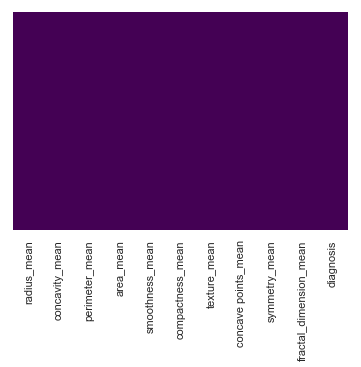

In [115]:
import seaborn as sns
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [116]:
data.describe()

,radius_mean,concavity_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,texture_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,0.088799,91.969033,654.889104,0.096360,0.104341,19.289649,0.048919,0.181162,0.062798,0.372583
std,3.524049,0.079720,24.298981,351.914129,0.014064,0.052813,4.301036,0.038803,0.027414,0.007060,0.483918
min,6.981000,0.000000,43.790000,143.500000,0.052630,0.019380,9.710000,0.000000,0.106000,0.049960,0.000000
25%,11.700000,0.029560,75.170000,420.300000,0.086370,0.064920,16.170000,0.020310,0.161900,0.057700,0.000000
50%,13.370000,0.061540,86.240000,551.100000,0.095870,0.092630,18.840000,0.033500,0.179200,0.061540,0.000000
75%,15.780000,0.130700,104.100000,782.700000,0.105300,0.130400,21.800000,0.074000,0.195700,0.066120,1.000000
max,28.110000,0.426800,188.500000,2501.000000,0.163400,0.345400,39.280000,0.201200,0.304000,0.097440,1.000000


# Discovering and visualizing the data to gain insights

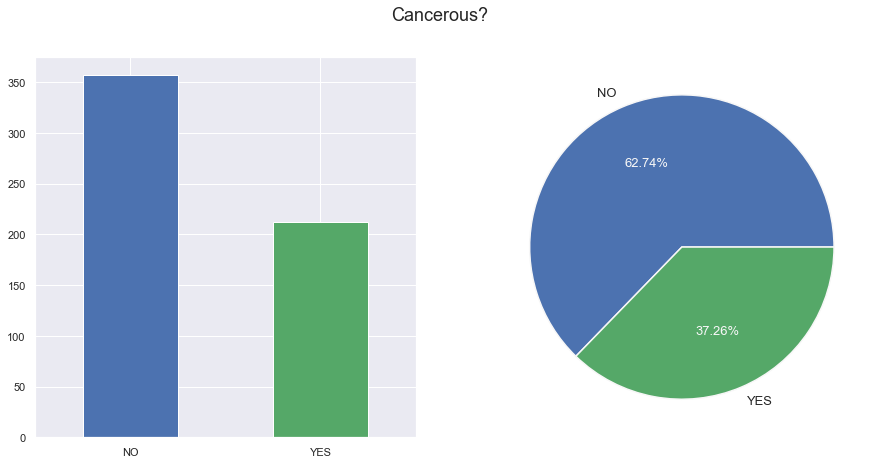

In [117]:
f, ax = plt.subplots(1, 2, figsize = (15, 7))
f.suptitle("Cancerous?", fontsize = 18.)
_ =data.diagnosis.value_counts().plot.bar(ax = ax[0], rot = 0, color = (sns.color_palette()[0], sns.color_palette()[2])).set(xticklabels = ["NO",'YES'])
_ = data.diagnosis.value_counts().plot.pie(labels = ("NO", "YES"), autopct = "%.2f%%", label = "", fontsize = 13., ax = ax[1],\
colors = (sns.color_palette()[0], sns.color_palette()[2]), wedgeprops = {"linewidth": 1.5, "edgecolor": "#F7F7F7"}), ax[1].texts[1].set_color("#F7F7F7"), ax[1].texts[3].set_color("#F7F7F7")

In [118]:
diagnosed_yes = data[data['diagnosis']==1]
diagnosed_no = data[data['diagnosis']==0]
print("Total =", len(data))

print("Number of women having breast cancer =", len(diagnosed_yes))
print("Percentage diagnosed yes =", 1.*len(diagnosed_yes)/len(data)*100.0, "%")
 
print("Number of women that does not have breast cancer =", len(diagnosed_no))
print("Percentage diagnosed no =", 1.*len(diagnosed_no)/len(data)*100.0, "%")
 

Total = 569
Number of women having breast cancer = 212
Percentage diagnosed yes = 37.258347978910365 %
Number of women that does not have breast cancer = 357
Percentage diagnosed no = 62.741652021089635 %


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


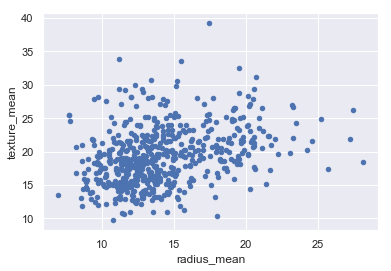

In [119]:
data.plot(kind="scatter", x="radius_mean", y="texture_mean")  #lesser the radius of the lump, lesser will be its texture

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


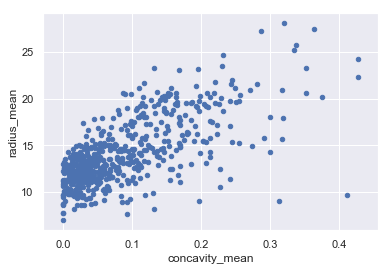

In [120]:
data.plot(kind="scatter", x="concavity_mean", y="radius_mean") 

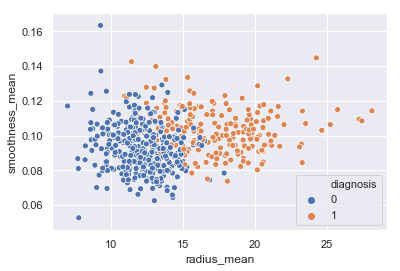

In [121]:
sns.scatterplot(data['radius_mean'], data['smoothness_mean'], hue = data['diagnosis']) # with increase in radius_mean and smoothness_mean, the probability 
#of a woman having cancer also increases

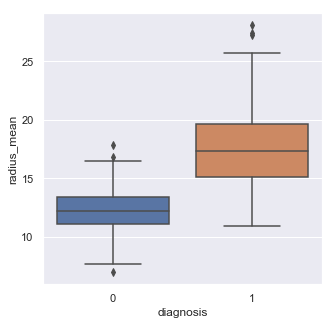

In [122]:
plt.figure(figsize=(5, 5))
sns.boxplot(x='diagnosis', y='radius_mean',data=data)  # higher the radius, higher is the chance of getting serious cancer

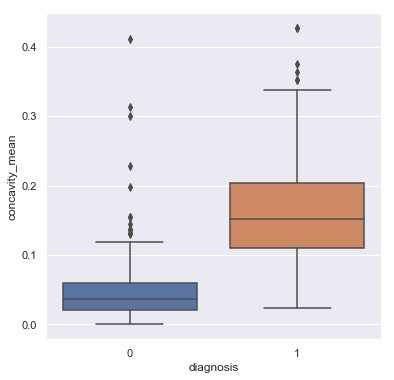

In [123]:
plt.figure(figsize=(6,6))
sns.boxplot(x='diagnosis', y='concavity_mean',data=data) # higheer the concavity, higher is the chance of getting cancer

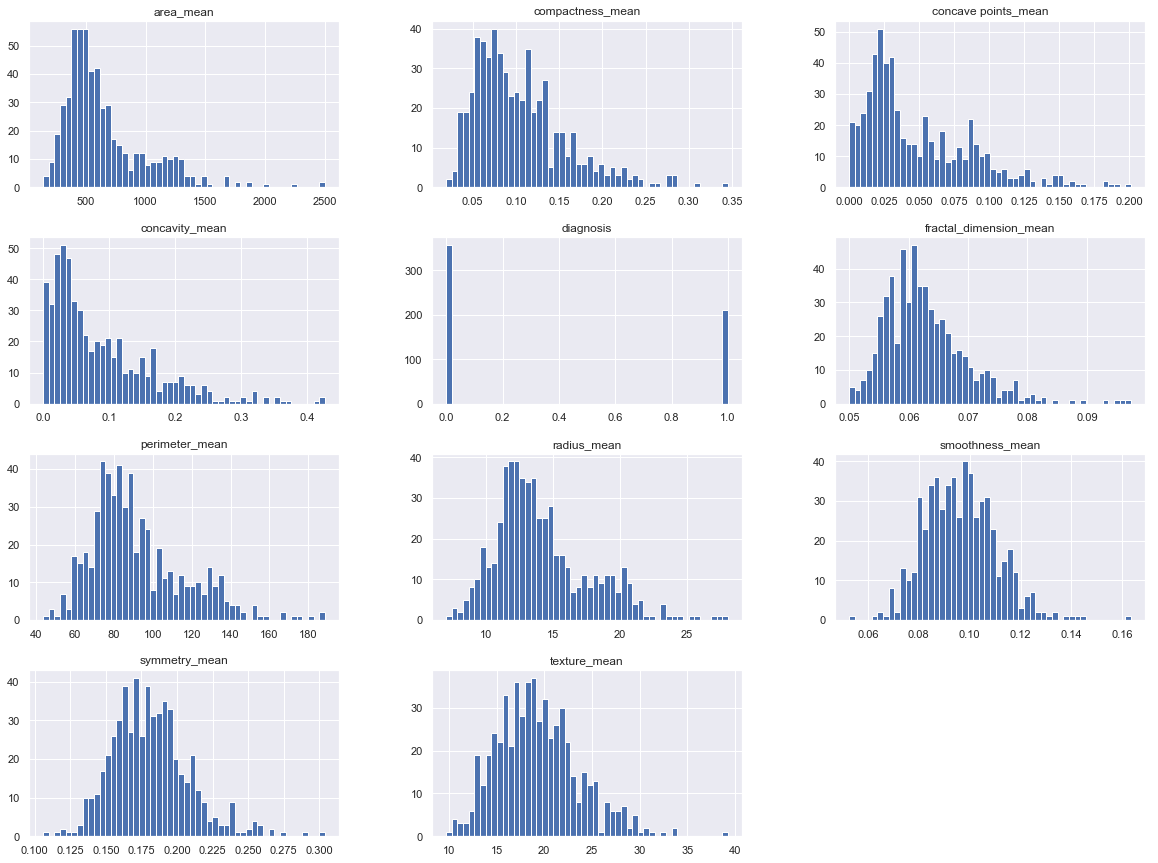

In [74]:
#distribution of each attribute
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15));


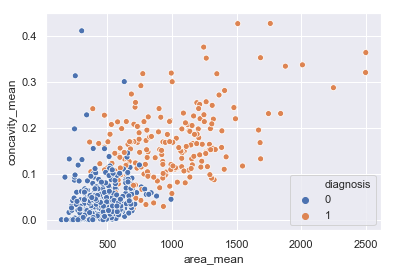

In [75]:
sns.scatterplot(x='area_mean', y = 'concavity_mean', data = data, hue = 'diagnosis')

AxesSubplot(0.125,0.125;0.62x0.755)


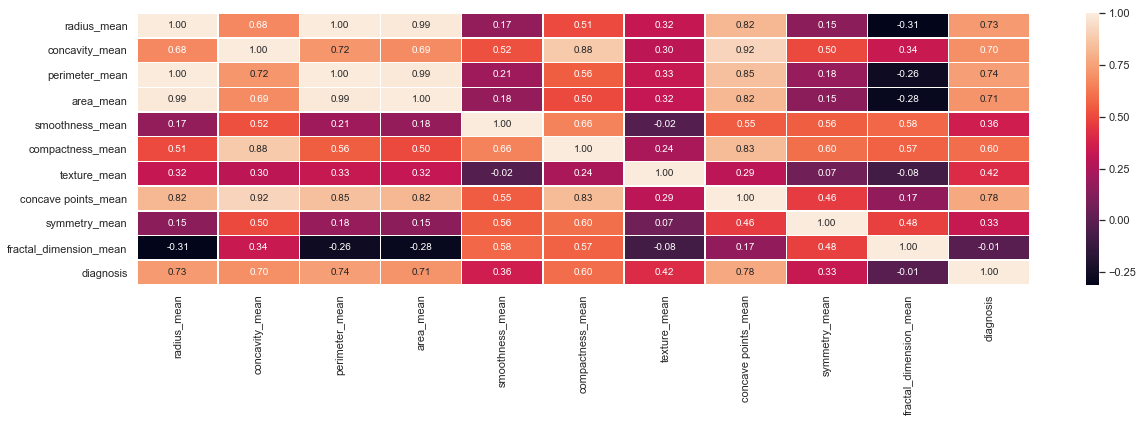

In [76]:
# Heat map tells us about the correlation among all attributes
corr=data.corr()
plt.figure(figsize=(20,5))
print(sns.heatmap(corr,annot=True,fmt=".2f",linewidths=.5))

In [77]:
corr_matrix = data.corr()

In [78]:
print("This is the correlation of each attribute wrt radius mean")
corr_matrix["radius_mean"].sort_values(ascending=False)

This is the correlation of each attribute wrt radius mean


radius_mean               1.000000
perimeter_mean            0.997855
area_mean                 0.987357
concave points_mean       0.822529
diagnosis                 0.730029
concavity_mean            0.676764
compactness_mean          0.506124
texture_mean              0.323782
smoothness_mean           0.170581
symmetry_mean             0.147741
fractal_dimension_mean   -0.311631
Name: radius_mean, dtype: float64

In [79]:
data.shape

(569, 11)

> >>># APPLYING REGRESSION MODELS

# Model 1:  LINEAR REGRESSION MODEL

In [80]:
r=data['radius_mean']
X=pd.DataFrame(r)
v=data['concave points_mean']
y=pd.DataFrame(v)

In [81]:
X.head()

,radius_mean
0,17.99
1,20.57
2,19.69
3,11.42
4,20.29


In [82]:
y.head()

,concave points_mean
0,0.14710
1,0.07017
2,0.12790
3,0.10520
4,0.10430


In [83]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=0)

In [84]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [85]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)


In [86]:
# Visualising the Training set results
import seaborn as sns
sns.set(color_codes=True)

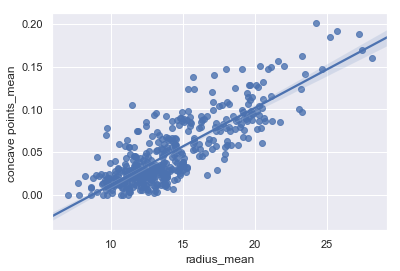

In [87]:
dataframe_training = pd.DataFrame()
dataframe_training['radius_mean'] = X_train['radius_mean']
dataframe_training['concave points_mean '] = y_train
ax = sns.regplot(x="radius_mean", y="concave points_mean ", data= dataframe_training)

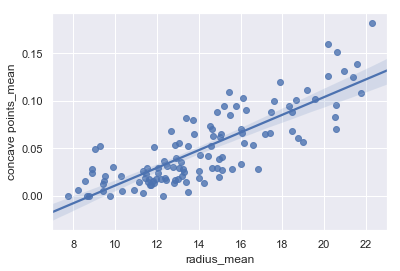

In [88]:
# Visualising the Test set results
dataframe_test = pd.DataFrame()
dataframe_test['radius_mean'] = X_test['radius_mean']
dataframe_test['concave points_mean'] = y_test
ax = sns.regplot(x="radius_mean", y="concave points_mean", data= dataframe_test)

intercept (often labeled the constant) is the expected mean value of Y when all X=0. <br>
The coefficients describe the mathematical relationship between each independent variable and the dependent variable.

In [89]:
from sklearn.metrics import mean_squared_error, r2_score
print('Coefficients: \n', regressor.coef_)
print('Intercept: \n', regressor.intercept_)


Coefficients: 
 [[0.00899233]]
Intercept: 
 [-0.07821426]


The mean squared error tells you how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them.

In [90]:
# The mean squared error
print("Mean squared error: {}".format(mean_squared_error(y_test, y_pred)))

Mean squared error: 0.0005188498430813791


In [2]:
#The smaller the means squared error, the closer you are to finding the line of best fit.

In [91]:
# Explained variance score: 1 is perfect prediction
print("Variance score: {}".format(r2_score(y_test, y_pred)))
print("r2 score: {}".format(r2_score(y_test,y_pred)))

Variance score: 0.669084227806056
r2 score: 0.669084227806056


In [92]:
import statsmodels.api as sm
x = sm.add_constant(X)

C:\Users\Admin\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [93]:
results = sm.OLS(endog = y, exog=x).fit()

In [94]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     concave points_mean   R-squared:                       0.677
Model:                             OLS   Adj. R-squared:                  0.676
Method:                  Least Squares   F-statistic:                     1186.
Date:                 Mon, 04 May 2020   Prob (F-statistic):          4.35e-141
Time:                         10:19:36   Log-Likelihood:                 1363.1
No. Observations:                  569   AIC:                            -2722.
Df Residuals:                      567   BIC:                            -2713.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0790      0.004    -20.640      0.000      -0.087      -0.072
radius_mean     0.0091      0.000     34.438      0.000       0.009       0.010
==============================================================================
Omnibus:                       38.876   Durbin-Watson:                   1.774
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.191
Skew:                           0.649   Prob(JB):                     1.54e-10
Kurtosis:                       3.470   Cond. No.                         60.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model2: LOGISTIC REGRESSION

In [29]:
data.head(5)

,radius_mean,concavity_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,texture_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis
0,17.99,0.3001,122.80,1001.0,0.11840,0.27760,10.38,0.14710,0.2419,0.07871,1
1,20.57,0.0869,132.90,1326.0,0.08474,0.07864,17.77,0.07017,0.1812,0.05667,1
2,19.69,0.1974,130.00,1203.0,0.10960,0.15990,21.25,0.12790,0.2069,0.05999,1
3,11.42,0.2414,77.58,386.1,0.14250,0.28390,20.38,0.10520,0.2597,0.09744,1
4,20.29,0.1980,135.10,1297.0,0.10030,0.13280,14.34,0.10430,0.1809,0.05883,1


In [9]:
#Step 1:
dataset = pd.read_csv('data.csv')
X = data.iloc[ : ,[0,1] ].values # will take values of radius and concavity
y = data.iloc[: ,10 ].values #diagnosis values

In [10]:
#Step 2:  Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [11]:
#Step 3: model training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
#Step 4: Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [13]:
y_proba = classifier.predict_proba(X_train)
y_proba

array([[9.94811785e-01, 5.18821515e-03],
       [9.88020627e-01, 1.19793735e-02],
       [4.52203458e-01, 5.47796542e-01],
       [9.73438228e-01, 2.65617716e-02],
       [9.76550901e-01, 2.34490993e-02],
       [8.94373284e-01, 1.05626716e-01],
       [9.82045537e-01, 1.79544630e-02],
       [9.54968737e-01, 4.50312626e-02],
       [1.13159478e-01, 8.86840522e-01],
       [9.54303936e-01, 4.56960641e-02],
       [2.67929567e-03, 9.97320704e-01],
       [9.02532644e-01, 9.74673562e-02],
       [7.61001547e-01, 2.38998453e-01],
       [9.83900287e-01, 1.60997134e-02],
       [9.90607788e-01, 9.39221172e-03],
       [9.94595702e-01, 5.40429796e-03],
       [4.28578535e-02, 9.57142146e-01],
       [9.96937327e-01, 3.06267322e-03],
       [9.66347319e-01, 3.36526807e-02],
       [8.04712343e-01, 1.95287657e-01],
       [7.74537035e-01, 2.25462965e-01],
       [9.87432502e-01, 1.25674978e-02],
       [7.73292144e-01, 2.26707856e-01],
       [5.47560665e-01, 4.52439335e-01],
       [1.244857

In [14]:
y_predict_train = classifier.predict(X_train)
y_predict_train

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,

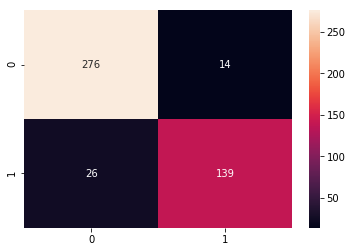

In [15]:
#confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True, fmt="d")

In [16]:
y_predict_test = classifier.predict(X_test)
y_predict_test

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0], dtype=int64)

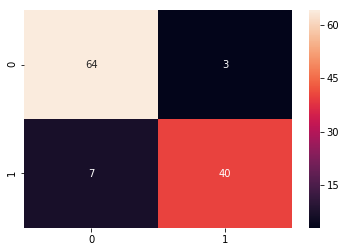

In [17]:
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, fmt="d")

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        67
           1       0.93      0.85      0.89        47

   micro avg       0.91      0.91      0.91       114
   macro avg       0.92      0.90      0.91       114
weighted avg       0.91      0.91      0.91       114



Precision - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. 

Recall (Sensitivity) - Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes. 

F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. <br><br>
The support is the number of samples of the true response that lie in that class

In [19]:
from sklearn import metrics
print("Accuracy of the model is : ", metrics.accuracy_score(y_test,y_predict_test))

Accuracy of the model is :  0.9122807017543859


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


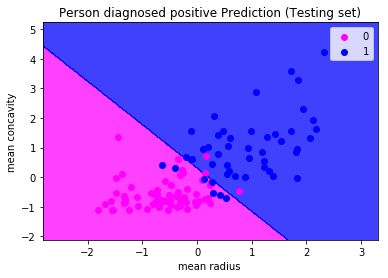

In [22]:
# Visualising the Testing set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('magenta', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('magenta', 'blue'))(i), label = j)
plt.title('Person diagnosed positive Prediction (Testing set)')
plt.xlabel('mean radius ')
plt.ylabel('mean concavity')
plt.legend()
plt.show()

>>> # APPLYING CLASSIFICATION MODEL

# Model 1: NAIVE BAYES

In [374]:
#Step 1: selection of appropriate column
#dataset = pd.read_csv('data.csv')
X = data.iloc[ : ,[0,1] ].values # will take values of radius and convavity
y = data.iloc[: ,10 ].values #diagnosis values

In [375]:
#Step 2:  Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


In [376]:
#Step 3: Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [377]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [378]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

(-2.100015180491763, 5.219984819508081)

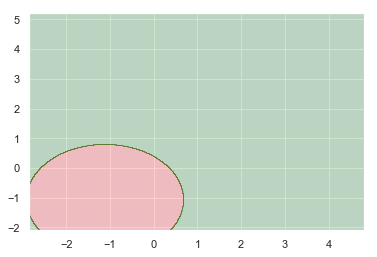

In [379]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.2, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


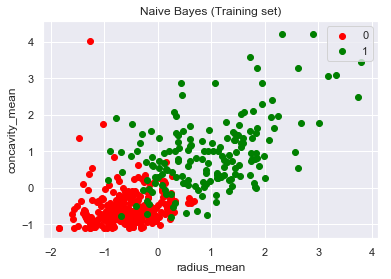

In [380]:
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('radius_mean')
plt.ylabel('concavity_mean')
plt.legend()
plt.show()


(-2.100015180491763, 3.8899848195081095)

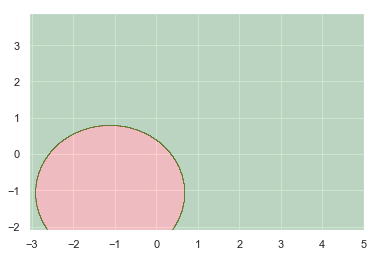

In [381]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.2, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


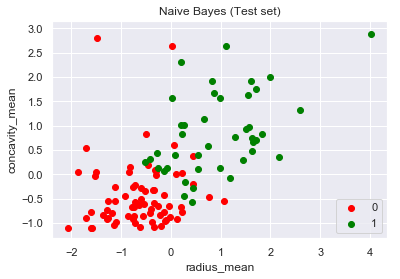

In [382]:
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('radius_mean')
plt.ylabel('concavity_mean')
plt.legend()
plt.show()

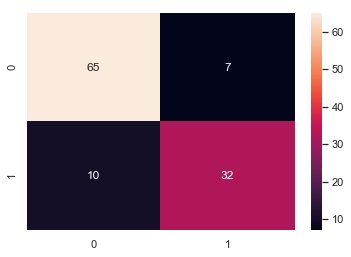

In [383]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")

In [384]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression


X = dataset.iloc[:, [0, 1]].values
Y = dataset.iloc[:, 10].values
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results)
print(results.mean())
print(results.std())


[0.64912281 0.84210526 0.89473684 0.8245614  0.94736842 0.98245614
 0.92982456 0.92982456 0.9122807  0.96428571]
0.88765664160401
0.09251568744632274


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [387]:

#F1 Score with Precision and Recall
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.87      0.90      0.88        72
           1       0.82      0.76      0.79        42

   micro avg       0.85      0.85      0.85       114
   macro avg       0.84      0.83      0.84       114
weighted avg       0.85      0.85      0.85       114



In [388]:
from sklearn import metrics
print("Accuracy of the model in naive bayes : ", metrics.accuracy_score(y_test,y_pred))

Accuracy of the model in naive bayes :  0.8508771929824561


# Model 2: KNN

In [389]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [390]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [391]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [392]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

(-2.103132847891172, 5.176867152108673)

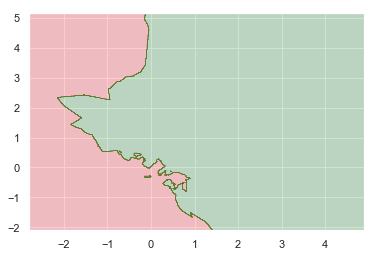

In [393]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.2, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


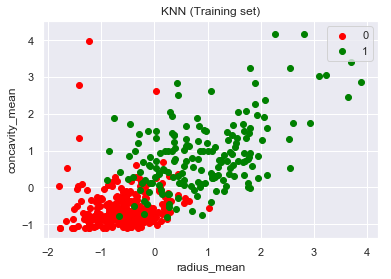

In [394]:
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KNN (Training set)')
plt.xlabel('radius_mean')
plt.ylabel('concavity_mean')
plt.legend()
plt.show()


(-2.103132847891172, 4.5368671521086865)

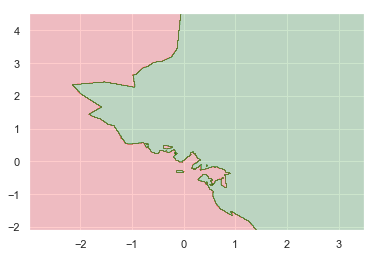

In [395]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.2, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


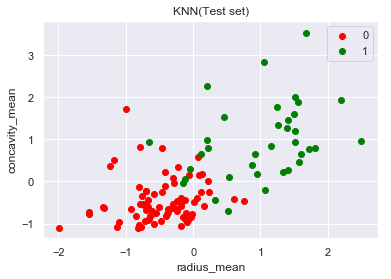

In [396]:
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KNN(Test set)')
plt.xlabel('radius_mean')
plt.ylabel('concavity_mean')
plt.legend()
plt.show()

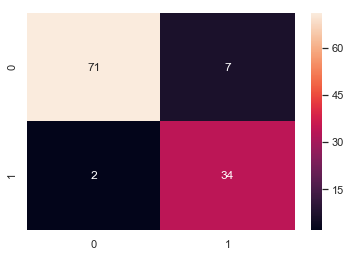

In [397]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")

In [398]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression


X = dataset.iloc[:, [0, 1]].values
Y = dataset.iloc[:, 10].values
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results)
print(results.mean())
print(results.std())


[0.64912281 0.84210526 0.89473684 0.8245614  0.94736842 0.98245614
 0.92982456 0.92982456 0.9122807  0.96428571]
0.88765664160401
0.09251568744632274


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [401]:

#F1 Score with Precision and Recall
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.97      0.91      0.94        78
           1       0.83      0.94      0.88        36

   micro avg       0.92      0.92      0.92       114
   macro avg       0.90      0.93      0.91       114
weighted avg       0.93      0.92      0.92       114



In [402]:
from sklearn import metrics
print("Accuracy of the model in KNN: ", metrics.accuracy_score(y_test,y_pred))

Accuracy of the model in KNN:  0.9210526315789473


# ANALYSIS
<BR>
Accuracy of the model in KNN:  0.92 ~ 92% <BR>
Accuracy of the model in naive bayes :  0.85 ~ 85%<BR>
Therefore, KNN is best classifier for the model

# THANK YOU !!